In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import collections
import random
import matplotlib.pyplot as plt
import sklearn.datasets

In [39]:
df = pd.read_csv('diabetes.csv')

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [41]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

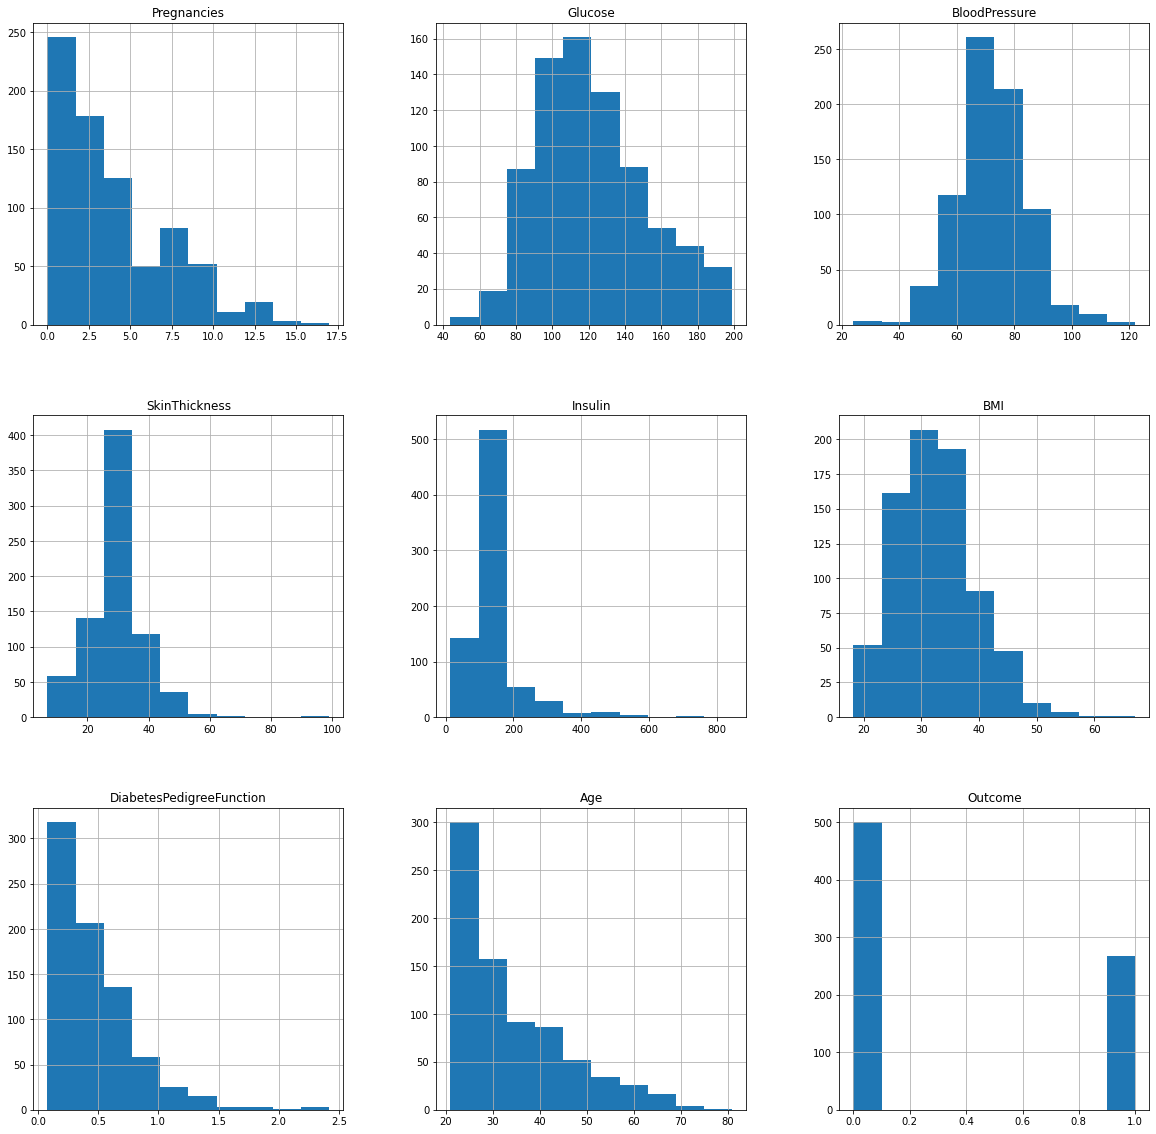

In [42]:
df.hist(figsize = (20,20))

In [ ]:
# add scatterplots? correlation heatmap?

In [46]:
# splitting in train and test 

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [64]:
# decision tree
# cost-complexity pruning, train and test error

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

In [65]:
alphas = dec_tree.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']
len_alphas = len(alphas)

train_err_dec_tree = np.zeros(len_alphas)
test_err_dec_tree = np.zeros(len_alphas)

for i in range(len_alphas):
    a = alphas[i]
    dec_tree.ccp_alpha = a
    dec_tree.fit(X_train,y_train)
    train_err_dec_tree[i] = dec_tree.score(X_train,y_train)
    test_err_dec_tree[i] = dec_tree.score(X_test,y_test)

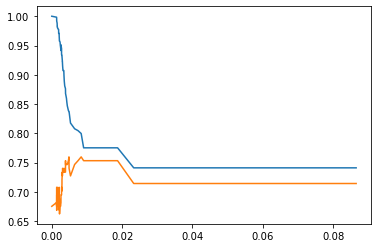

In [66]:
fig = plt.figure(figsize = (10,8))
plt.plot(alphas,train_err_dec_tree, label = 'Training accuracy')
plt.plot(alphas,test_err_dec_tree, label = 'Test accuracy')
plt.legend()
plt.xtitle()
plt.ytitle()
plt.title()
plt.show()
plt.savefig()

In [94]:
# random forest: m parameter choice sqrt(p) or different?

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ntrees_v = np.linspace(1,101,100)
rf = RandomForestClassifier()
ab = GradientBoostingClassifier()

test_err_rf = []
test_err_ab = []

for n in ntrees_v:

    rf.n_estimators = int(n)
    rf.fit(X_train,y_train)
    test_err_rf.append(rf.score(X_test,y_test))

    ab.n_estimators = int(n)
    ab.fit(X_train,y_train)
    test_err_ab.append(ab.score(X_test,y_test))


# compare classification error with increasing number of trees

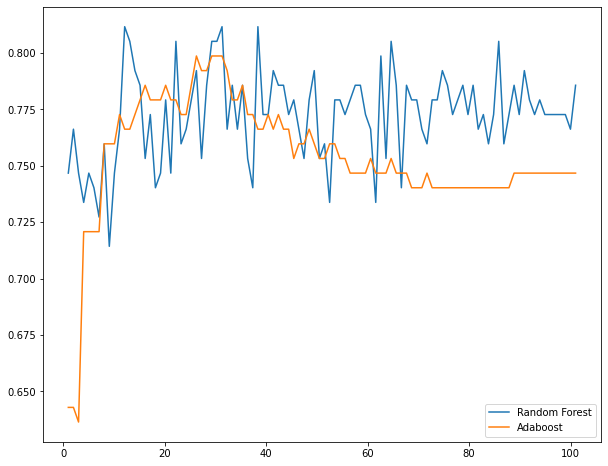

In [95]:
fig = plt.figure(figsize = (10,8))
plt.plot(ntrees_v,test_err_rf, label = 'Random Forest')
plt.plot(ntrees_v,test_err_ab, label = 'Adaboost')
plt.legend()
# plt.xtitle()
# plt.ytitle()
# plt.title()
# plt.show()
# plt.savefig()

In [91]:
dec_tree = DecisionTreeClassifier(max_depth=1)
dec_tree.fit(X_train,y_train).score(X_test,y_test)

0.7142857142857143

In [97]:
n_vars = range(1,9)

rf = RandomForestClassifier(n_estimators=2000)

test_err_rf = []

for n in n_vars:

    rf.max_features = n
    rf.fit(X_train,y_train)
    test_err_rf.append(rf.score(X_test,y_test))

Text(0.5, 1.0, 'Random Forest changing number of predictors considered at each split')

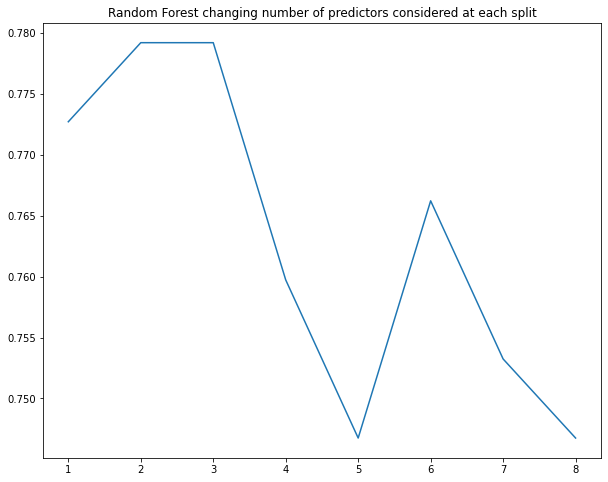

In [98]:
fig = plt.figure(figsize = (10,8))
plt.plot(n_vars,test_err_rf)
# plt.xtitle()
# plt.ytitle()
plt.title("Random Forest changing number of predictors considered at each split")
# plt.show()
# plt.savefig()


* confronto metodi con nostri
* variable importance? -> variable selection
* Roc curves? Other metrics.....